In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import collections
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [2]:
#b) Construct a descriptive analysis for the selected dataset. 

In [3]:
df = pd.read_csv('ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))
df['Height'] = df['Height']*100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [15]:
#EDA

In [17]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value), df[x].dtype)
    print(df[x].unique())

Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


In [19]:
df1 = df.copy()

In [21]:
mapping0 = {1:'Never', 2:'Sometimes', 3:'Always'}
mapping1 = {1: '1', 2:'2' , 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

In [23]:
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

In [25]:
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,Always,3,Sometimes,no,More than 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III


<Axes: xlabel='Gender', ylabel='Weight'>

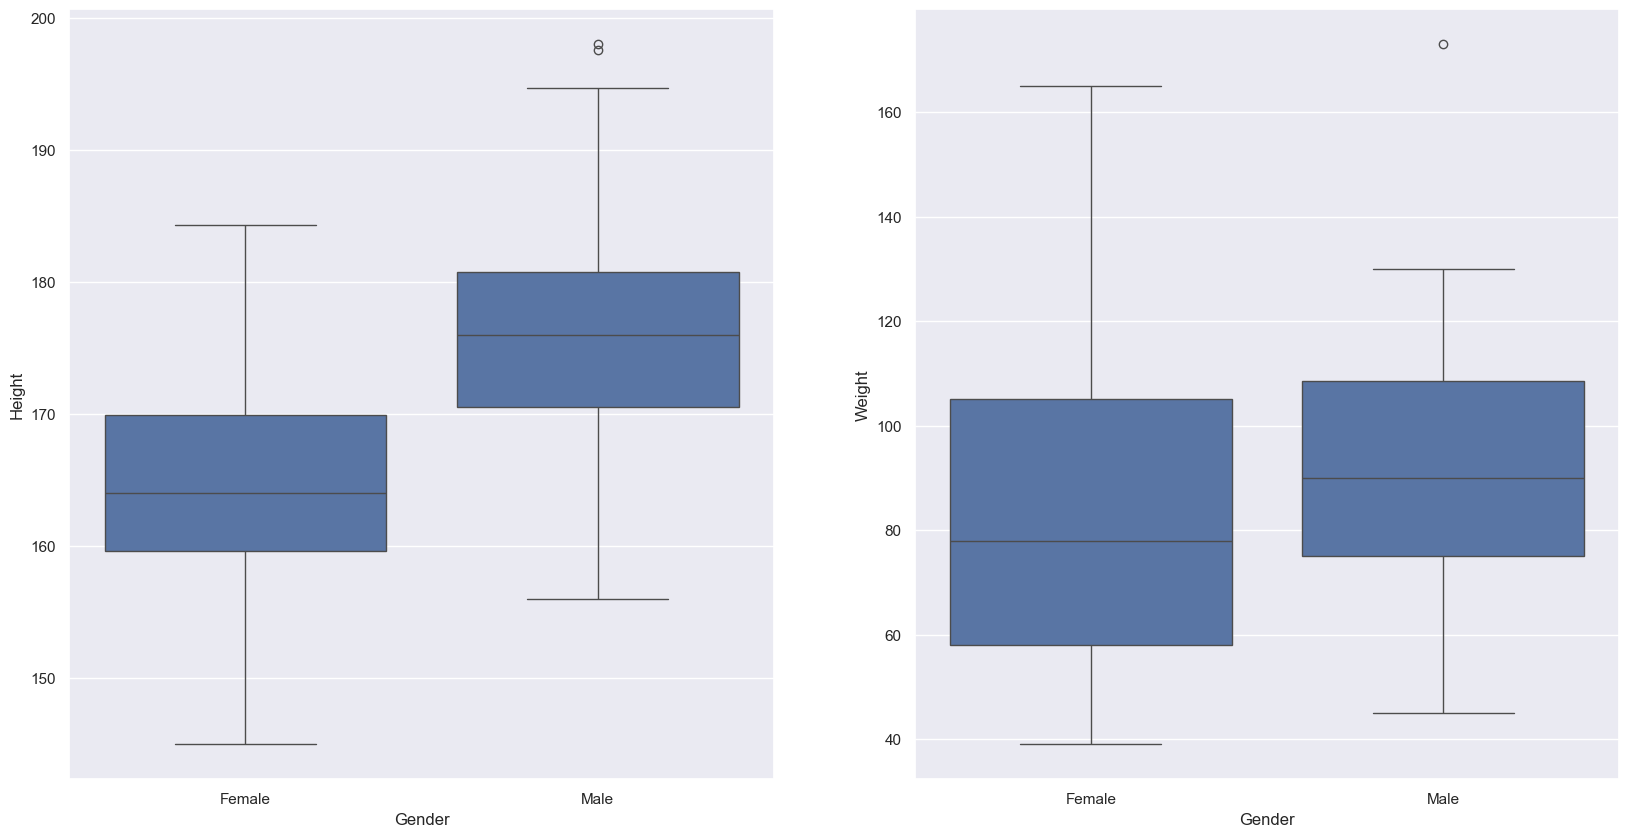

In [27]:
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)

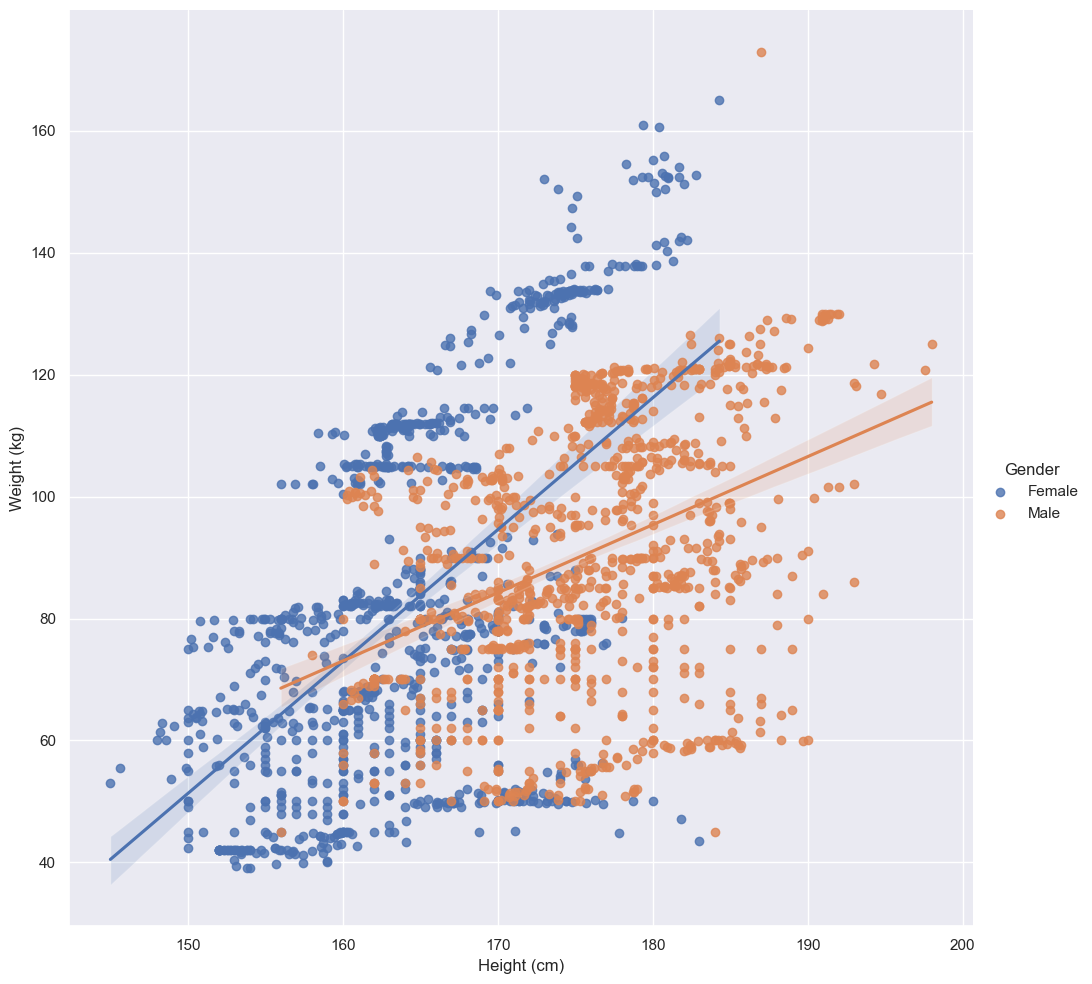

In [29]:
g = sns.lmplot(x="Height", y="Weight", hue="Gender",
               height=10, data=df)
g.set_axis_labels("Height (cm)", "Weight (kg)")

Counter({'Obesity Type I': 351, 'Obesity Type III': 324, 'Obesity Type II': 297, 'Overweight Level I': 290, 'Overweight Level II': 290, 'Normal Weight': 287, 'Insufficient Weight': 272})


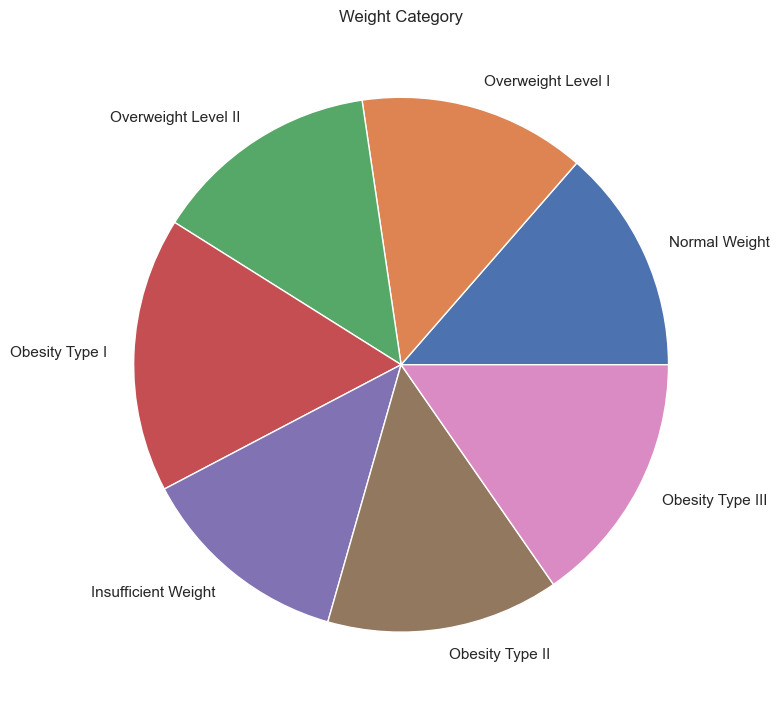

In [31]:
c = Counter(df['Obesity'])
print(c)
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category') 
plt.tight_layout()

Counter({'Obesity Type II': 295, 'Obesity Type I': 195, 'Overweight Level II': 187, 'Normal Weight': 146, 'Overweight Level I': 145, 'Insufficient Weight': 99, 'Obesity Type III': 1})
Counter({'Obesity Type III': 323, 'Insufficient Weight': 173, 'Obesity Type I': 156, 'Overweight Level I': 145, 'Normal Weight': 141, 'Overweight Level II': 103, 'Obesity Type II': 2})


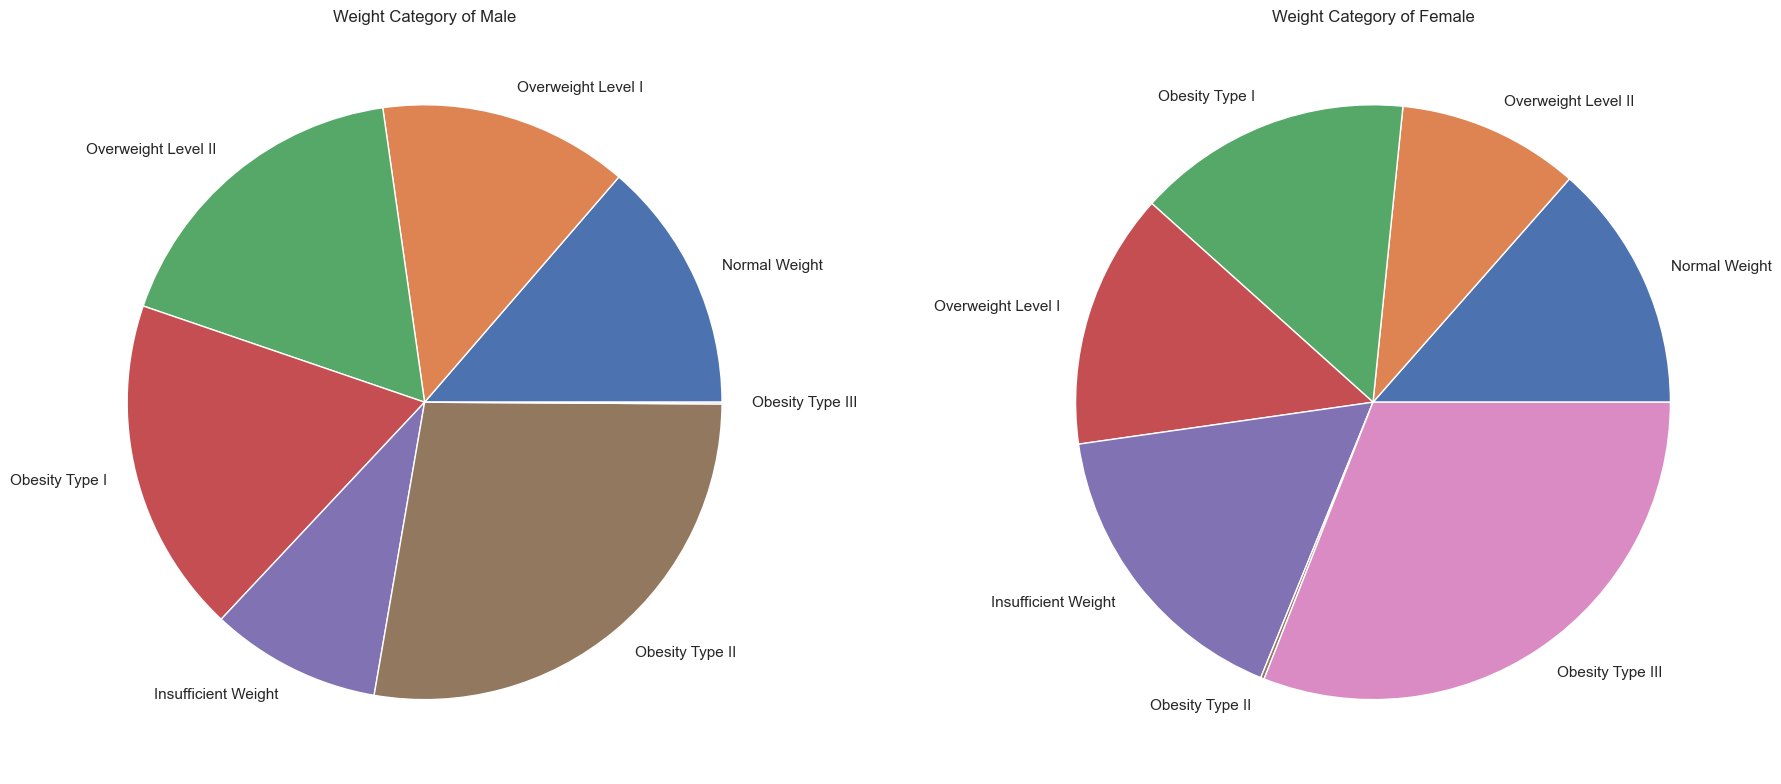

In [33]:
filt = df['Gender'] == 'Male'
c_m = Counter(df.loc[filt, 'Obesity'])
print(c_m)
c_f = Counter(df.loc[~filt, 'Obesity'])
print(c_f)
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male') 
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female') 
plt.tight_layout()

In [35]:
#c) Construct a proper way of identifying and handling the missing values. 

In [37]:
# identify categorical columns
cat = df1.dtypes == object

cat_labels = cat[cat].index
print('Categorical Columns:', cat_labels)
false = cat[~cat]
num_labels = false.index
print('Numerical Columns:', num_labels)

Categorical Columns: Index(['Gender', 'Family History with Overweight',
       'Frequent consumption of high caloric food',
       'Consumption of food between meals', 'Smoke',
       'Calories consumption monitoring', 'Consumption of alcohol',
       'Transportation used', 'Obesity'],
      dtype='object')
Numerical Columns: Index(['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
       'Number of main meals', 'Consumption of water daily',
       'Physical activity frequency', 'Time using technology devices'],
      dtype='object')


In [39]:
X = df1.drop(columns='Obesity')
y = df['Obesity']

In [41]:
# Identify categorical and numerical columns
Scale_features = ['Age', 'Height', 'Weight']
Ordi_features = ['Consumption of food between meals', 'Consumption of alcohol']
NonO_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Smoke', 'Calories consumption monitoring', 'Transportation used']

In [43]:
# 5. Define transformers for each group
Scale_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Ordi_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())
])

NonO_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [45]:
Preprocessor = ColumnTransformer(transformers=[
    ('scale', Scale_transformer, Scale_features),
    ('ordinal', Ordi_transformer, Ordi_features),
    ('nonordinal', NonO_transformer, NonO_features)
], remainder='drop')

In [47]:
#Summarize missing values
print(df1.isnull().sum())

Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64


In [49]:
#e) Propose model performance evaluations using Confusion Matrix for each algorithm in (d) with example of calculation. 

In [51]:
# Train-Test Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [53]:
# 8. Define model pipelines
models = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (SVM)": SVC(kernel='rbf', C=1, gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}

model_scores = {}

In [55]:
# 9. Train and evaluate all models
for name, model in models.items():
    pipeline = Pipeline([
        ('pre', Preprocessor),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(name)
    print("Score: %.3f" % accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    model_scores[name] = accuracy_score(y_test, y_pred)

K-Nearest Neighbors (KNN)
Score: 0.882
                     precision    recall  f1-score   support

Insufficient Weight       0.82      0.93      0.87        54
      Normal Weight       0.75      0.66      0.70        58
     Obesity Type I       0.89      0.93      0.91        70
    Obesity Type II       0.97      0.97      0.97        60
   Obesity Type III       0.98      1.00      0.99        65
 Overweight Level I       0.83      0.84      0.84        58
Overweight Level II       0.91      0.83      0.86        58

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.88      0.88      0.88       423

[[50  3  0  0  0  1  0]
 [ 9 38  1  0  0  7  3]
 [ 0  2 65  1  1  1  0]
 [ 0  0  2 58  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 1  5  1  0  0 49  2]
 [ 1  3  4  1  0  1 48]]
Support Vector Machine (SVM)
Score: 0.922
                     precision    recall  f1-score   support

Insufficient W

In [56]:
# 10. Show accuracy ranking
print("\nModel Accuracies Ranking")
sorted_scores = dict(sorted(model_scores.items(), key=lambda item: item[1], reverse=True))
for model, score in sorted_scores.items():
    print(f"{model}: {score:.4f}")


Model Accuracies Ranking
Random Forest: 0.9338
Decision Tree: 0.9267
Support Vector Machine (SVM): 0.9220
K-Nearest Neighbors (KNN): 0.8818


In [135]:
#f) Propose ONE (1) feature selection for each algorithm in (d). 

In [59]:
#KNN Filter method (mutual info class)
X_processed = Preprocessor.fit_transform(X)
feature_names = Preprocessor.get_feature_names_out()

selector_knn = SelectKBest(score_func=mutual_info_classif, k=10)
X_knn_selected = selector_knn.fit_transform(X_processed, y)

selected_knn_features = feature_names[selector_knn.get_support()]
print("KNN Features selection:", selected_knn_features)

KNN Features selection: ['scale__Age' 'scale__Height' 'scale__Weight'
 'ordinal__Consumption of food between meals'
 'ordinal__Consumption of alcohol' 'nonordinal__Gender_Female'
 'nonordinal__Gender_Male' 'nonordinal__Family History with Overweight_no'
 'nonordinal__Family History with Overweight_yes'
 'nonordinal__Frequent consumption of high caloric food_yes']


In [61]:
#SVC Wrapper method(RFE)
svc = LinearSVC(max_iter=10000, dual=False)
rfe = RFE(estimator=svc, n_features_to_select=10)

rfe.fit(X_processed, y)
selected_svm_features = feature_names[rfe.get_support()]
print("SVM Features Selection:", selected_svm_features)

SVM Features Selection: ['scale__Height' 'scale__Weight' 'nonordinal__Gender_Female'
 'nonordinal__Gender_Male' 'nonordinal__Family History with Overweight_no'
 'nonordinal__Family History with Overweight_yes'
 'nonordinal__Frequent consumption of high caloric food_no'
 'nonordinal__Frequent consumption of high caloric food_yes'
 'nonordinal__Smoke_no' 'nonordinal__Smoke_yes']


In [63]:
#Decision Tree Embedded method (Feature Importance)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_processed, y)

importances_dt = pd.Series(dt_model.feature_importances_, index=feature_names)
top_dt_features = importances_dt.sort_values(ascending=False).head(10)
print("Decision Tree Features Selection:\n", top_dt_features)

Decision Tree Features Selection:
 scale__Weight                                               0.480639
scale__Height                                               0.230857
nonordinal__Gender_Female                                   0.158427
scale__Age                                                  0.053312
ordinal__Consumption of alcohol                             0.024632
nonordinal__Frequent consumption of high caloric food_no    0.019963
ordinal__Consumption of food between meals                  0.012963
nonordinal__Gender_Male                                     0.003520
nonordinal__Transportation used_Automobile                  0.003188
nonordinal__Transportation used_Walking                     0.002758
dtype: float64


In [65]:
#Random Forest Embedded method (Feature Importance)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_processed, y)

importances_rf = pd.Series(rf_model.feature_importances_, index=feature_names)
top_rf_features = importances_rf.sort_values(ascending=False).head(10)
print("Random Forest Features Selection:\n", top_rf_features)

Random Forest Features Selection:
 scale__Weight                                            0.406065
scale__Height                                            0.139925
scale__Age                                               0.138560
ordinal__Consumption of alcohol                          0.050864
nonordinal__Gender_Male                                  0.043837
ordinal__Consumption of food between meals               0.043345
nonordinal__Gender_Female                                0.037962
nonordinal__Family History with Overweight_no            0.026303
nonordinal__Family History with Overweight_yes           0.023390
nonordinal__Transportation used_Public Transportation    0.019590
dtype: float64


In [67]:
import joblib
import sklearn

print("scikit-learn version:", sklearn.__version__)  # should be 1.7.0
joblib.dump(pipeline, 'obesitymodel_v170.pkl')

scikit-learn version: 1.7.0


['obesitymodel_v170.pkl']